In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=sns.load_dataset("titanic")

In [4]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df=dataset

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.value_counts()

survived  pclass  sex     age   sibsp  parch  fare      embarked  class  who    adult_male  deck  embark_town  alive  alone
1         1       female  24.0  0      0      69.3000   C         First  woman  False       B     Cherbourg    yes    True     2
                          58.0  0      0      26.5500   S         First  woman  False       C     Southampton  yes    True     1
                          49.0  0      0      25.9292   S         First  woman  False       D     Southampton  yes    True     1
                                1      0      76.7292   C         First  woman  False       D     Cherbourg    yes    False    1
                          50.0  0      1      247.5208  C         First  woman  False       B     Cherbourg    yes    False    1
                                                                                                                              ..
                          16.0  0      0      86.5000   S         First  woman  False       B     Sout

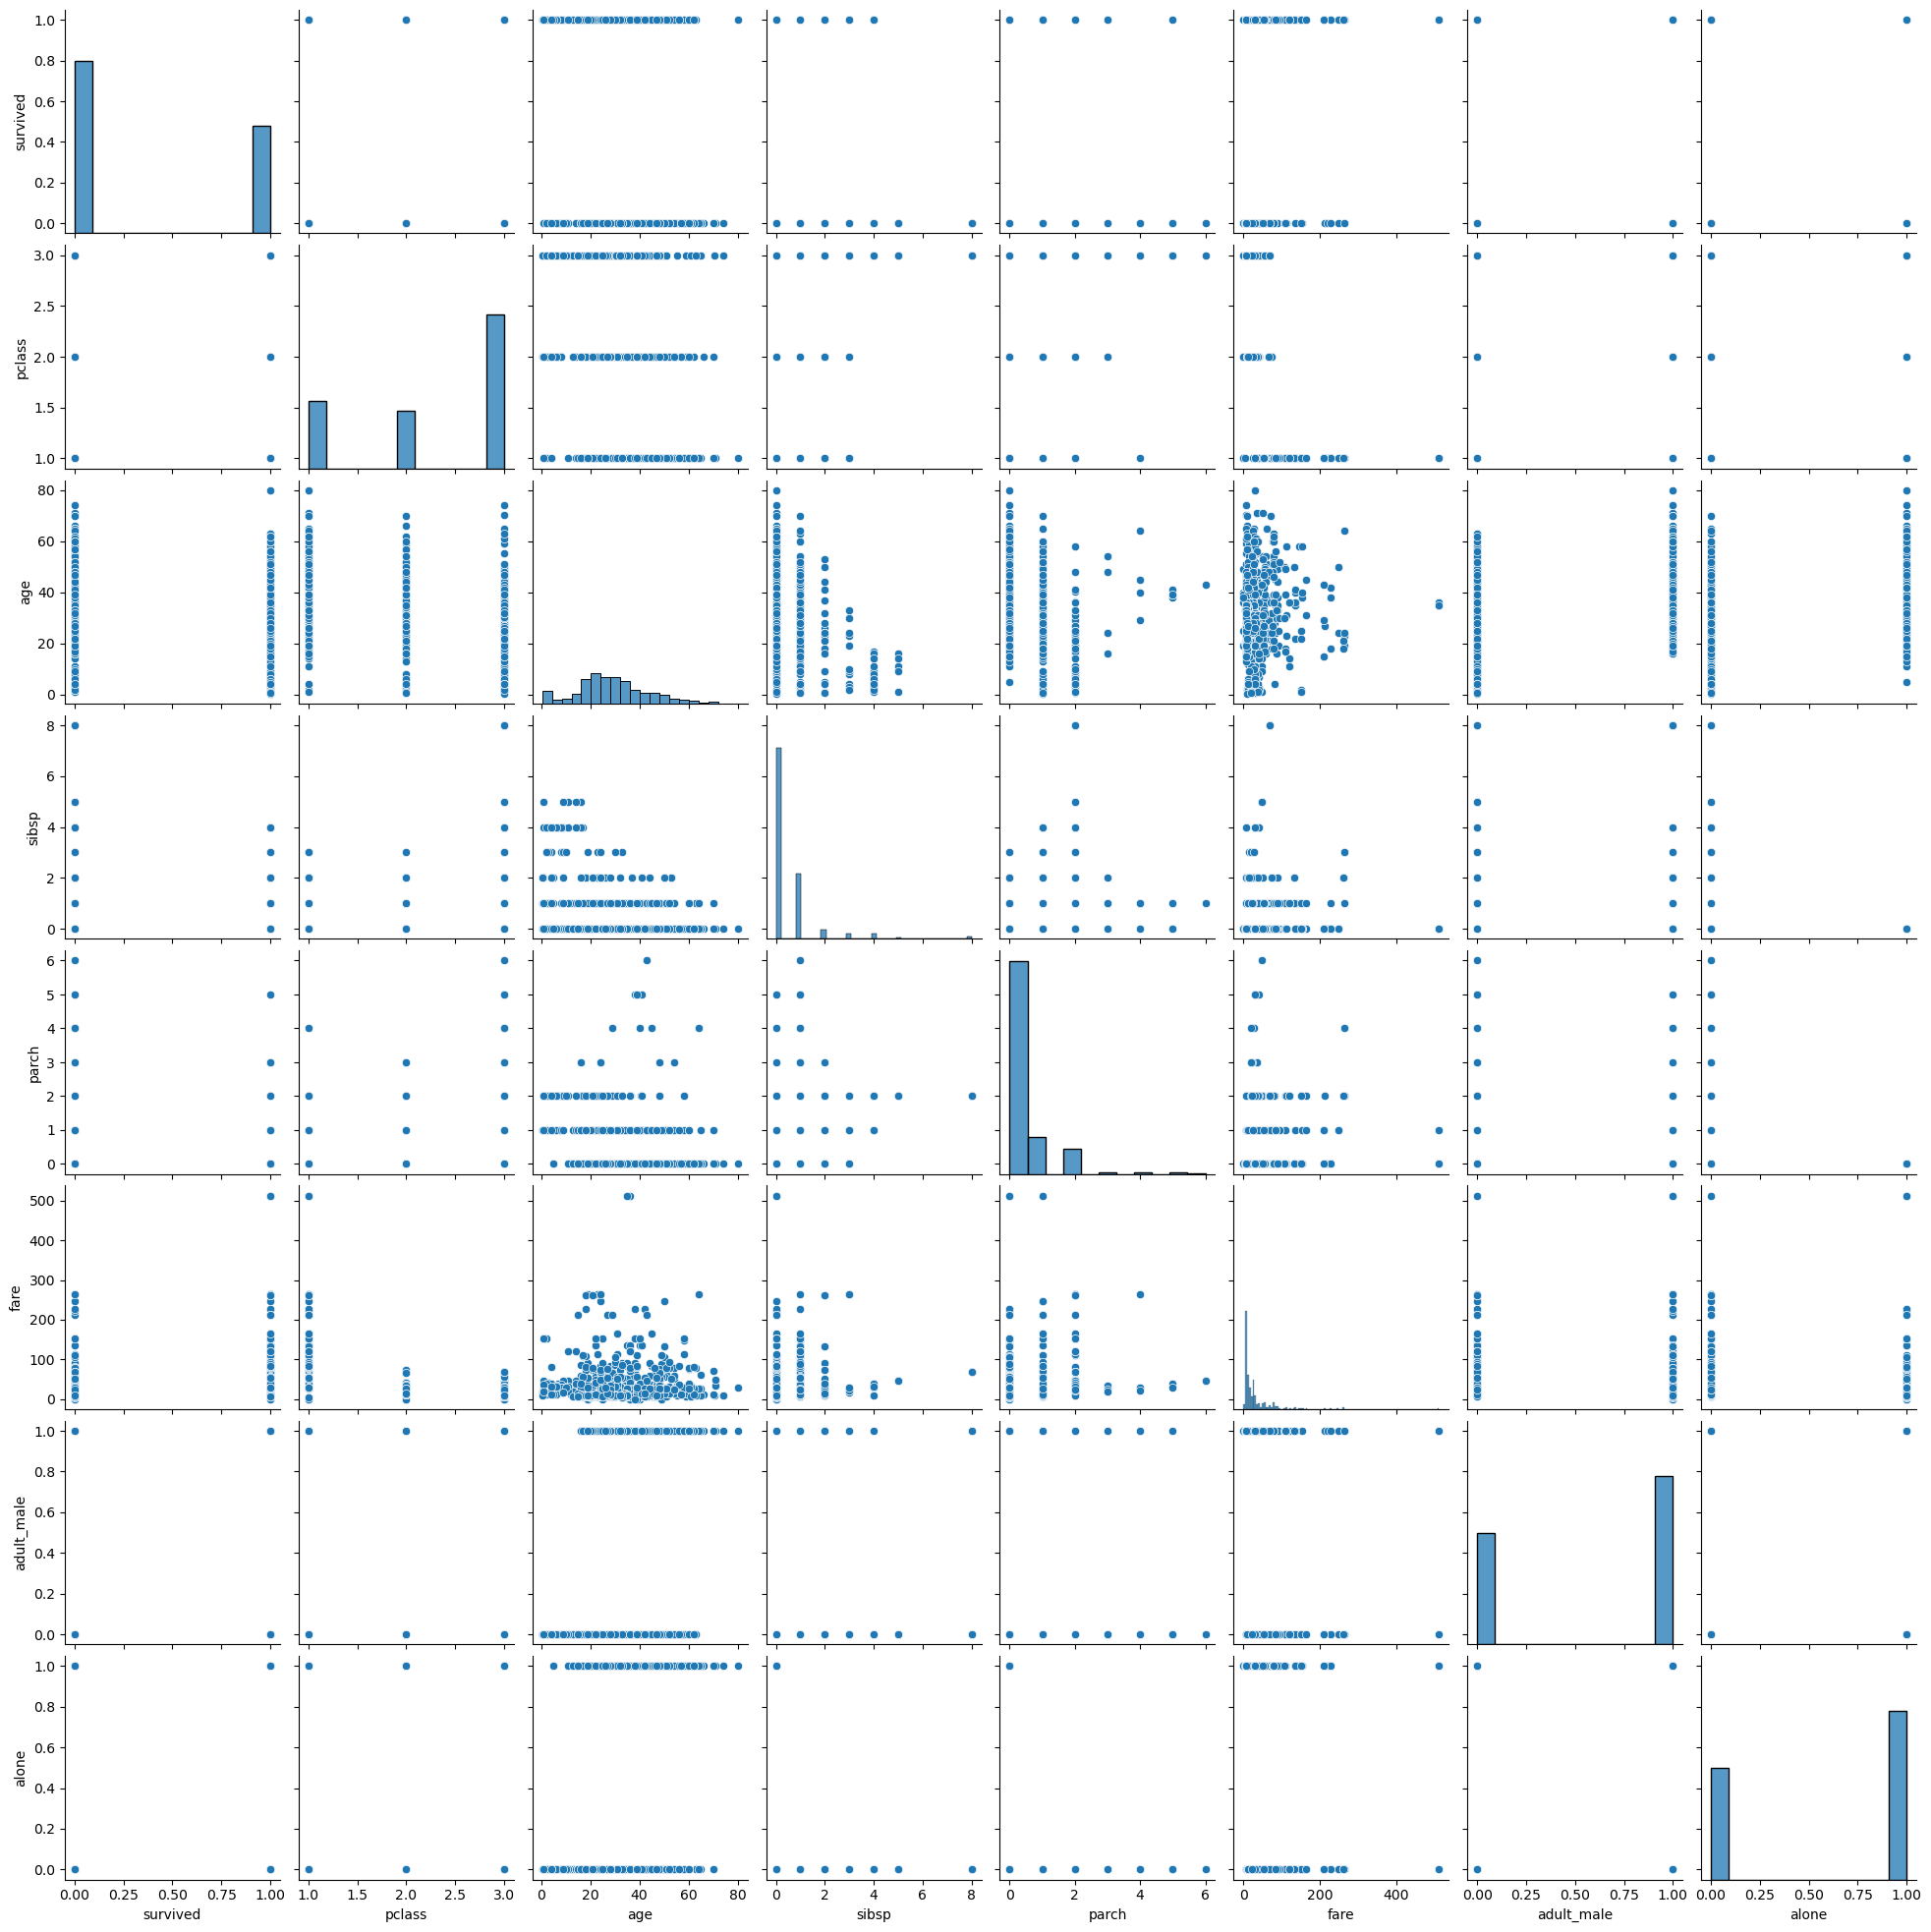

In [10]:
pair=sns.pairplot(df)

In [11]:
matrix = df.corr()
plt.figure(figsize=(25,9))
heat=sns.heatmap(matrix)

ValueError: could not convert string to float: 'male'

In [12]:
df=df.select_dtypes(include=['int64','float64'])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


<Axes: >

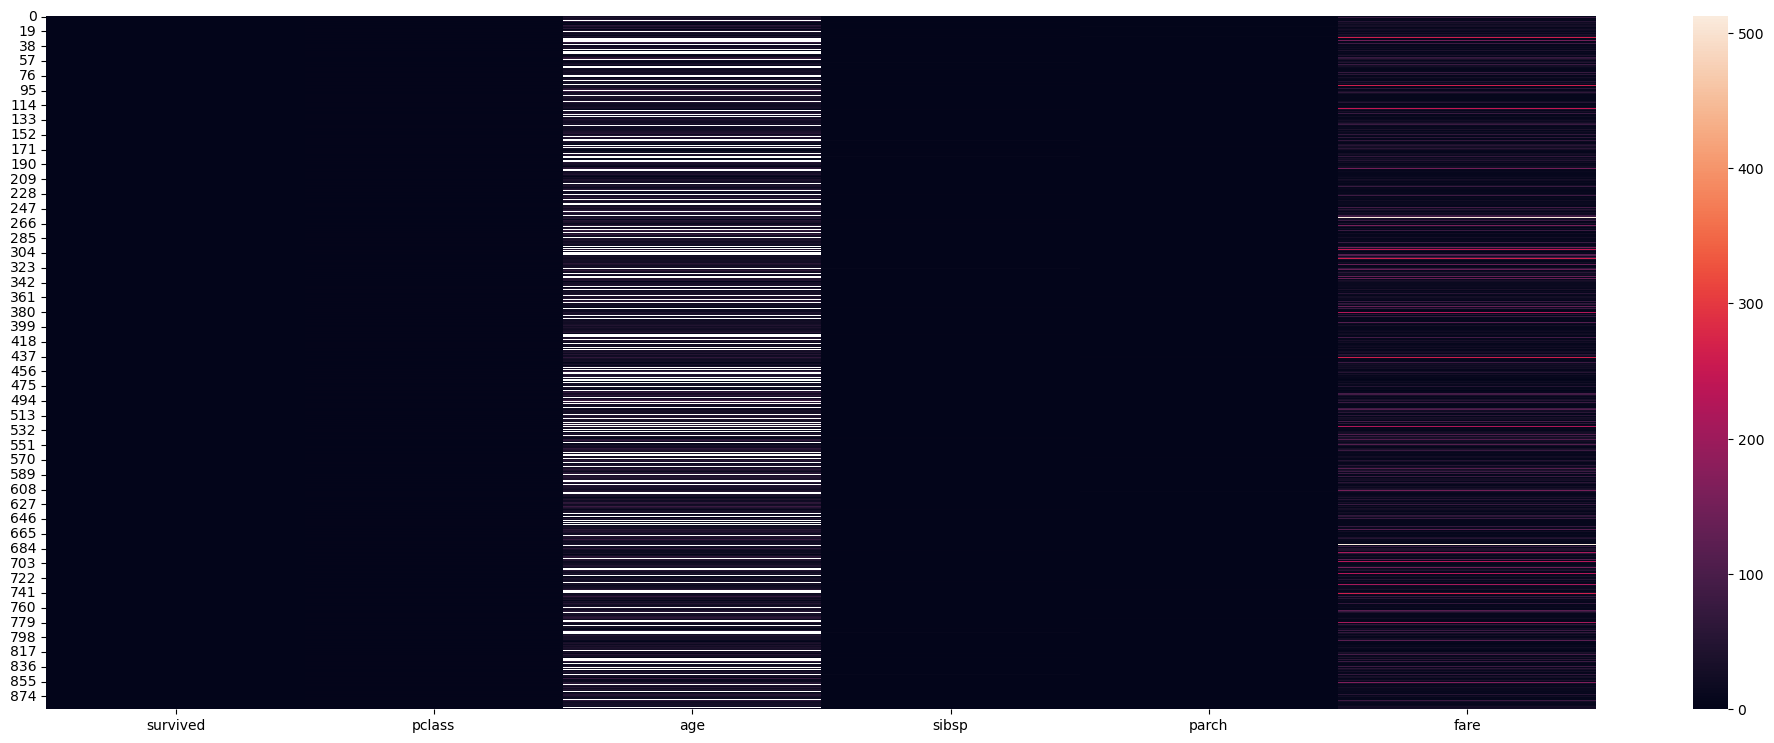

In [13]:
plt.figure(figsize=(25,9))
sns.heatmap(df)

Relationships and Trends

From Pairplot:

There is no discernible linear relationship between age and fare.

Fare vs. Pclass: There was a negative correlation; first class passengers paid more.

Passengers travelling with siblings frequently had parents or kids with them, suggesting a somewhat positive relationship between SibSp and Parch.

From the Heatmap:

Parch and sibsp had the strongest correlation (those with family had both parents/children and siblings).

Pclass and fare have a negative correlation (higher class = lower class number = higher fare).

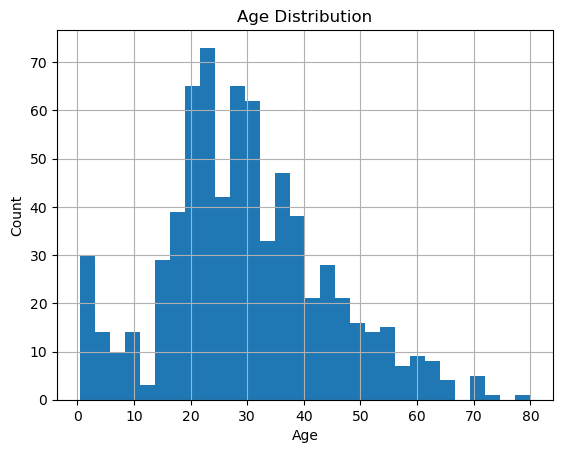

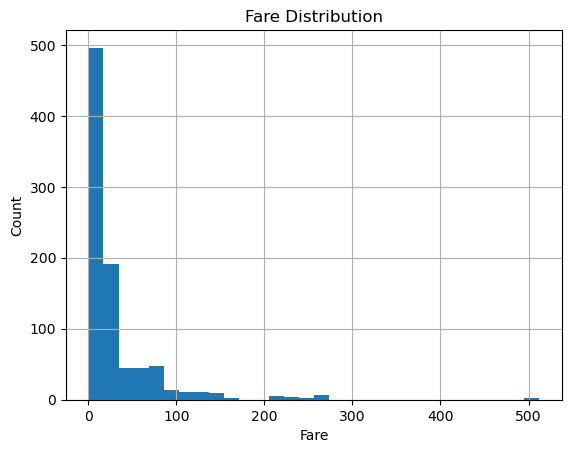

In [16]:
# Histogram 
# Age distribution
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Fare distribution
df['fare'].hist(bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

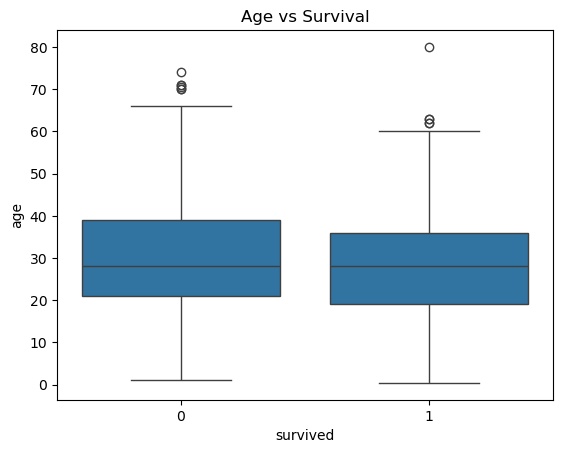

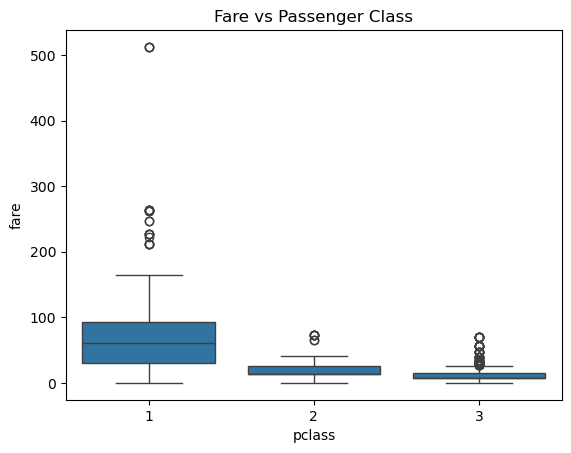

In [21]:
# Boxplot
# Boxplot of Age by Survived
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs Survival')
plt.show()

# Boxplot of Fare by Pclass
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare vs Passenger Class')
plt.show()

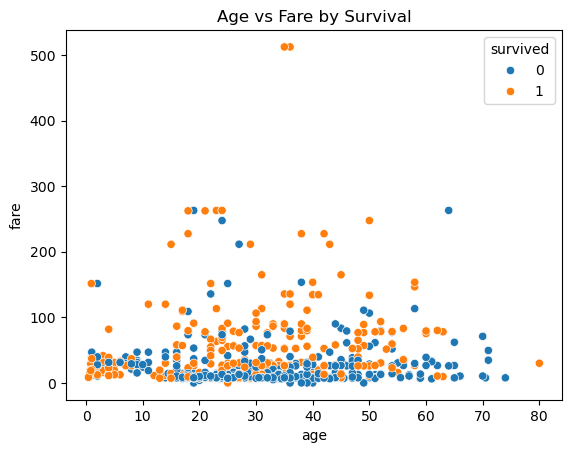

In [19]:
# Scatterplot
# Scatterplot of Age vs Fare
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title('Age vs Fare by Survival')
plt.show()

Write Observations for Each Visual

Visualization	Observations

Pairplot	Strong clustering between fare and pclass; SibSp and Parch weakly correlated

Heatmap	Strongest correlation between SibSp and Parch; Pclass inversely correlated with Fare

Histogram (Age)	Most passengers aged between 20-40 years

Histogram (Fare)	Highly skewed to the right, with a few very expensive fares

Boxplot (Pclass vs Age)	1st class passengers were older than 3rd class

Boxplot (Sex vs Age)	Similar age distribution between males and females

Scatterplot (Age vs Fare)	1st class passengers paid higher fares, age had no clear relation


Provide Summary of Findings
Summary:

Age Distribution: Most passengers were young adults.

Fare Distribution: Majority paid lower fares; only a few paid very high fares.

Class and Fare: Strong negative relationship — 1st class passengers paid much higher fares.

Family (SibSp/Parch): Those with more siblings usually had parents/children traveling too.

Age and Class: 1st class passengers tended to be older.

Overall: Passenger class and family presence had more influence on fare and survival chances than age.